<a href="https://colab.research.google.com/github/schatz06/EPL448_Project/blob/main/ReviewsRatingsEdition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Packages ## 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
import pandas.plotting as pdplt

##Read Data##

In [2]:
train_data = pd.read_excel('Data_Train.xlsx') # read training data
test_data  = pd.read_excel('Data_Test.xlsx') # read test data

Check for corrupted or empty records

In [3]:
print("Shape of train data",train_data.shape,"Problematic records in training data: ",train_data.isnull().sum().sum())
print("Shape of test data",test_data.shape,"Problematic records in test data: ",test_data.isnull().sum().sum())

Shape of train data (6237, 9) Problematic records in training data:  0
Shape of test data (1560, 8) Problematic records in test data:  0


##Train Data Preprocessing##

Peek of the data

In [4]:
train_data.head()

Title  ...   Price
0         The Prisoner's Gold (The Hunters 3)  ...  220.00
1          Guru Dutt: A Tragedy in Three Acts  ...  202.93
2                Leviathan (Penguin Classics)  ...  299.00
3          A Pocket Full of Rye (Miss Marple)  ...  180.00
4  LIFE 70 Years of Extraordinary Photography  ...  965.62

[5 rows x 9 columns]

Statistical summary

In [5]:
print(train_data.describe())

              Price
count   6237.000000
mean     560.707516
std      690.110657
min       25.000000
25%      249.180000
50%      373.000000
75%      599.000000
max    14100.000000


Price box plot

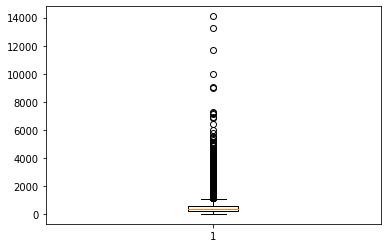

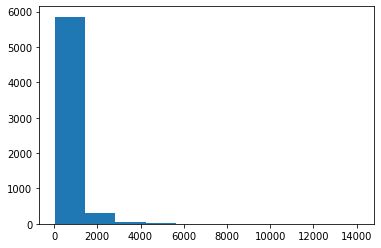

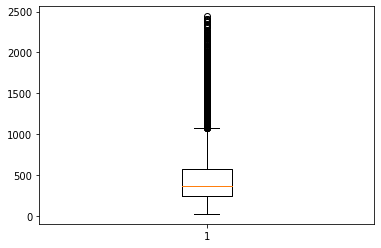

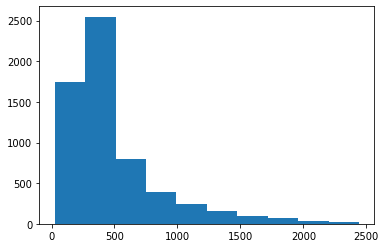

In [6]:
plt.boxplot(train_data['Price'])
plt.show()
plt.hist(train_data['Price'])
plt.show()
median = np.percentile(train_data.Price,50)  # median
std = train_data.Price.std() # standard deviation 
train_data = train_data.drop(train_data[ train_data.Price > (median+3*std)].index) # drop "outliers " that are > median + 3*std
plt.boxplot(train_data['Price'])
plt.show()
plt.hist(train_data['Price'])
plt.show()

In [7]:
train_data.describe()

Price
count  6105.000000
mean    487.640822
std     384.816876
min      25.000000
25%     248.000000
50%     369.000000
75%     579.000000
max    2442.000000

Reviews Normalization

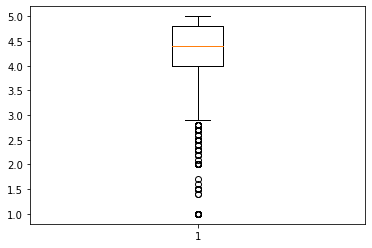

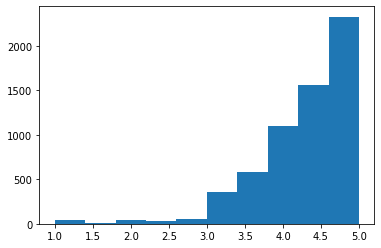

In [8]:
train_data['Reviews'] = train_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule 
plt.boxplot(train_data['Reviews'])
plt.show()
plt.hist(train_data['Reviews'])
plt.show()

Ratings Normalization

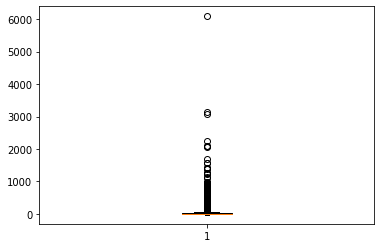

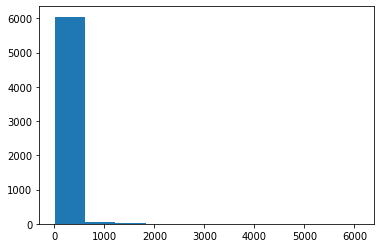

In [9]:
train_data['Ratings'] = train_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 
plt.boxplot(train_data['Ratings'])
plt.show()
plt.hist(train_data['Ratings'])
plt.show()

Drop Title & Author & Synopsis & Genre columns

In [10]:
train_data.pop('Author')
train_data.pop('Title')
train_data.pop('Synopsis')
train_data.pop('Genre')

0         Action & Adventure (Books)
1         Cinema & Broadcast (Books)
2            International Relations
3       Contemporary Fiction (Books)
4              Photography Textbooks
                    ...             
6232            Anthropology (Books)
6233    Contemporary Fiction (Books)
6234                 Romance (Books)
6235      Action & Adventure (Books)
6236      Action & Adventure (Books)
Name: Genre, Length: 6105, dtype: object

Edition Normalization / Drop edition

In [11]:
train_data['Edition'] = train_data['Edition'].apply(lambda x: x.split(',')[0])

In [12]:
train_data.head()

Edition  Reviews  Ratings                          BookCategory   Price
0  Paperback      4.0      8.0                    Action & Adventure  220.00
1  Paperback      3.9     14.0  Biographies, Diaries & True Accounts  202.93
2  Paperback      4.8      6.0                                Humour  299.00
3  Paperback      4.1     13.0             Crime, Thriller & Mystery  180.00
4  Hardcover      5.0      1.0              Arts, Film & Photography  965.62

Book Category Normalization / Extract Categories

In [13]:
train_data.pop('BookCategory')

0                         Action & Adventure
1       Biographies, Diaries & True Accounts
2                                     Humour
3                  Crime, Thriller & Mystery
4                   Arts, Film & Photography
                        ...                 
6232                                  Humour
6233               Crime, Thriller & Mystery
6234                                 Romance
6235                      Action & Adventure
6236                      Action & Adventure
Name: BookCategory, Length: 6105, dtype: object

Finish training inputs(z)

In [14]:
z = train_data

In [15]:
train_data.head()

Edition  Reviews  Ratings   Price
0  Paperback      4.0      8.0  220.00
1  Paperback      3.9     14.0  202.93
2  Paperback      4.8      6.0  299.00
3  Paperback      4.1     13.0  180.00
4  Hardcover      5.0      1.0  965.62

##Test Data Preprocessing##

Reviews Normalization

In [16]:
test_data['Reviews'] = test_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule  

Ratings Normalization

In [17]:
test_data['Ratings'] = test_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 

Drop Title & Synopsis columns

In [18]:
test_data.pop('Title')
test_data.pop('Synopsis')
test_data.pop('Author')
test_data.pop('Genre')

0                            Short Stories (Books)
1                      Operating Systems Textbooks
2                                  Romance (Books)
3       Programming & Software Development (Books)
4                              Linguistics (Books)
                           ...                    
1555                                        Design
1556                  Children's Reference (Books)
1557                                Humour (Books)
1558                         United States History
1559                                  Dictionaries
Name: Genre, Length: 1560, dtype: object

Edition Normalization / Drop edition 

In [19]:
test_data['Edition'] = test_data['Edition'].apply(lambda x: x.split(',')[0])

In [20]:
test_data.head()

Edition  Reviews  Ratings                         BookCategory
0  Mass Market Paperback      4.4    960.0            Crime, Thriller & Mystery
1              Paperback      5.0      1.0  Computing, Internet & Digital Media
2              Paperback      5.0      4.0                              Romance
3              Paperback      4.1     11.0  Computing, Internet & Digital Media
4              Paperback      4.4      9.0      Language, Linguistics & Writing

Book Category Normalization / Extract Categories

In [21]:
test_data.pop('BookCategory')

0                  Crime, Thriller & Mystery
1        Computing, Internet & Digital Media
2                                    Romance
3        Computing, Internet & Digital Media
4            Language, Linguistics & Writing
                        ...                 
1555     Computing, Internet & Digital Media
1556    Biographies, Diaries & True Accounts
1557                                  Humour
1558    Biographies, Diaries & True Accounts
1559         Language, Linguistics & Writing
Name: BookCategory, Length: 1560, dtype: object

Finish Test set Inputs

In [22]:
z_test = test_data
z_test.head()

Edition  Reviews  Ratings
0  Mass Market Paperback      4.4    960.0
1              Paperback      5.0      1.0
2              Paperback      5.0      4.0
3              Paperback      4.1     11.0
4              Paperback      4.4      9.0

## Combine Train and Test datasets to extract categorical features ##

In [23]:
train = train_data.copy()
test = test_data.copy()
concat = pd.concat(objs=[train,test],axis=0)
y = train.pop('Price')

In [24]:
concat.head()

Edition  Reviews  Ratings   Price
0  Paperback      4.0      8.0  220.00
1  Paperback      3.9     14.0  202.93
2  Paperback      4.8      6.0  299.00
3  Paperback      4.1     13.0  180.00
4  Hardcover      5.0      1.0  965.62

In [25]:
concat= pd.get_dummies(concat, columns= ['Edition'],drop_first=True)

In [26]:
concat.head()

Reviews  Ratings  ...  Edition_Spiral-bound  Edition_Tankobon Softcover
0      4.0      8.0  ...                     0                           0
1      3.9     14.0  ...                     0                           0
2      4.8      6.0  ...                     0                           0
3      4.1     13.0  ...                     0                           0
4      5.0      1.0  ...                     0                           0

[5 rows x 21 columns]

In [27]:
train_size = len(train)
train = concat[:train_size]
test = concat[train_size:]

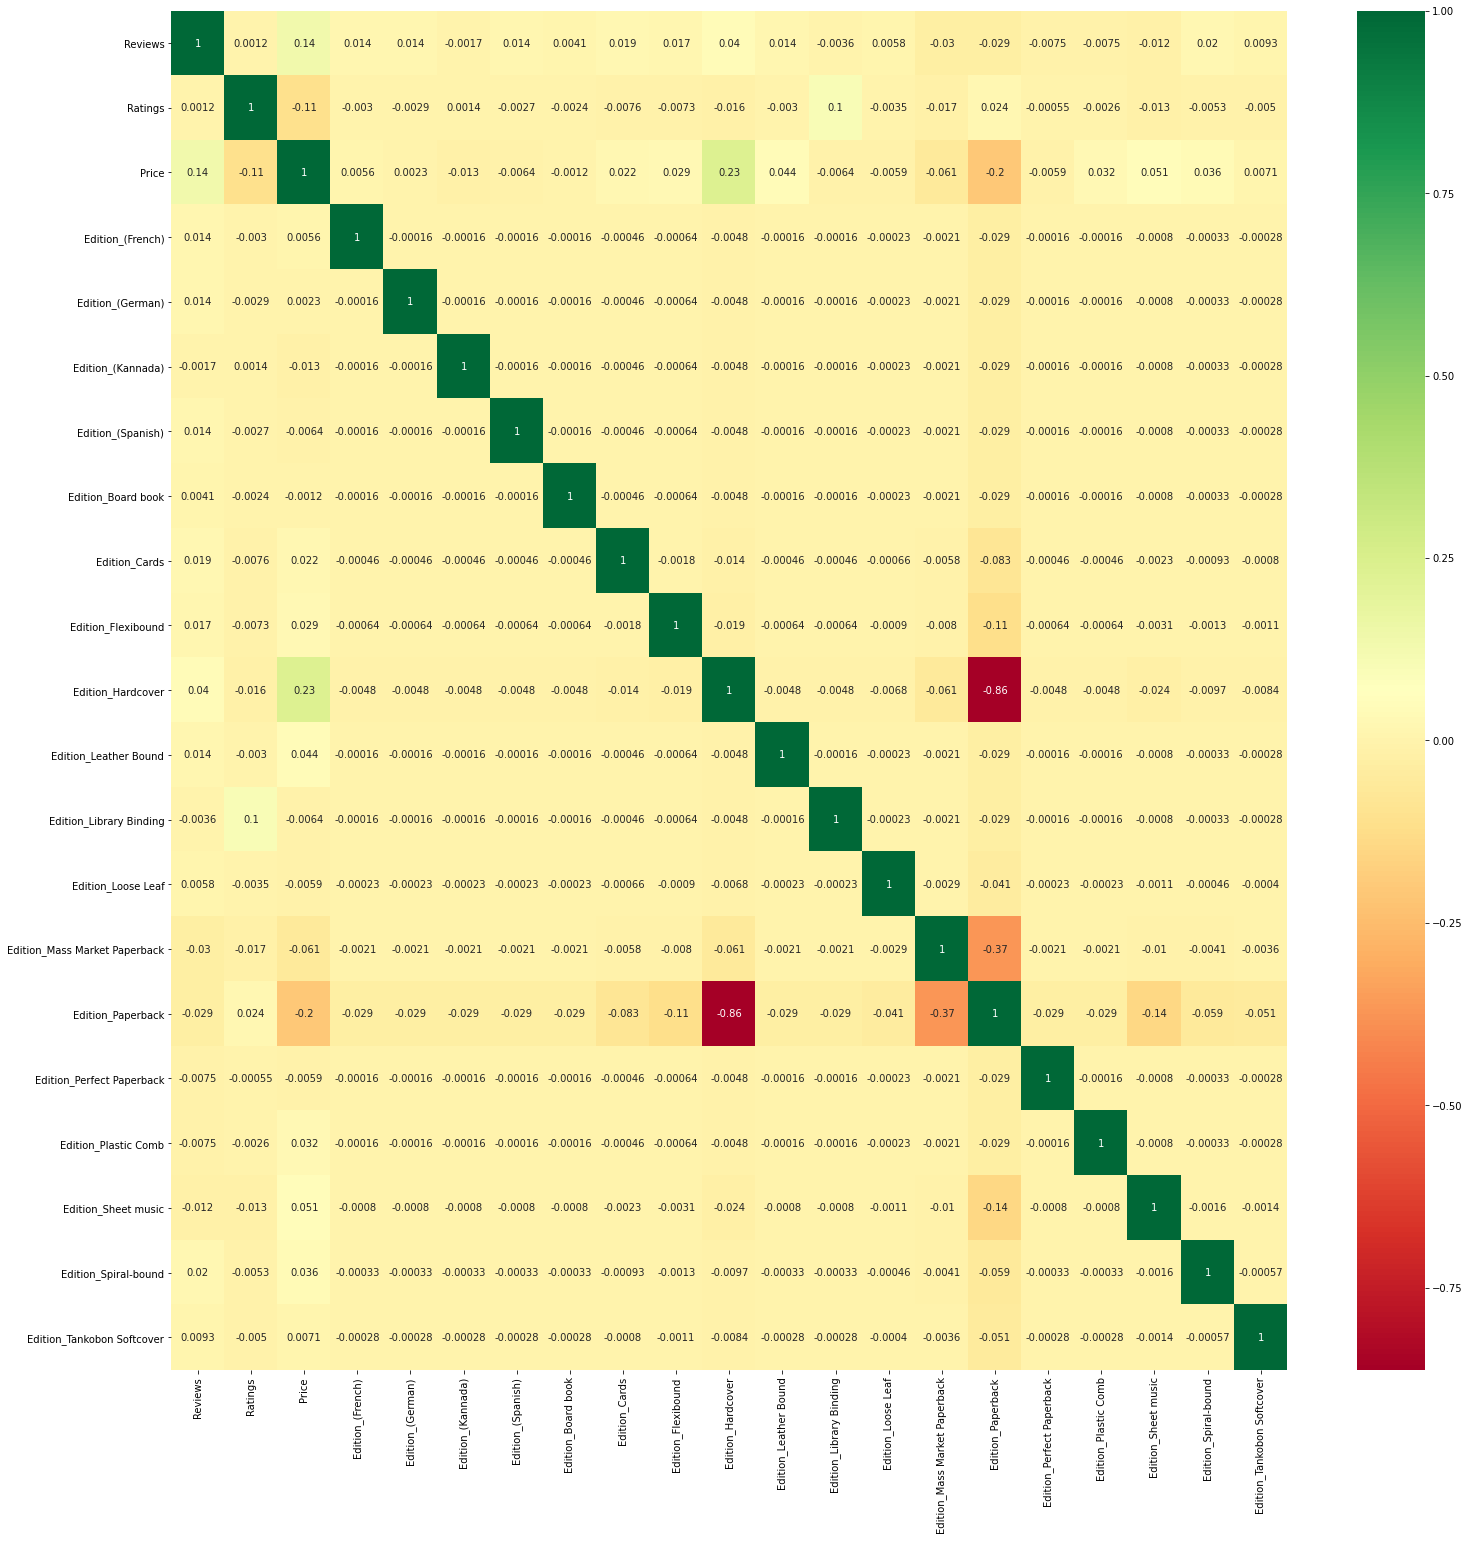

In [28]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(train.corr(), annot=True, cmap='RdYlGn')

In [29]:
train.head()

Reviews  Ratings  ...  Edition_Spiral-bound  Edition_Tankobon Softcover
0      4.0      8.0  ...                     0                           0
1      3.9     14.0  ...                     0                           0
2      4.8      6.0  ...                     0                           0
3      4.1     13.0  ...                     0                           0
4      5.0      1.0  ...                     0                           0

[5 rows x 21 columns]

In [30]:
y = train.pop('Price')
train.head()

Reviews  Ratings  ...  Edition_Spiral-bound  Edition_Tankobon Softcover
0      4.0      8.0  ...                     0                           0
1      3.9     14.0  ...                     0                           0
2      4.8      6.0  ...                     0                           0
3      4.1     13.0  ...                     0                           0
4      5.0      1.0  ...                     0                           0

[5 rows x 20 columns]

In [31]:
test.pop('Price')
test.head()

Reviews  Ratings  ...  Edition_Spiral-bound  Edition_Tankobon Softcover
0      4.4    960.0  ...                     0                           0
1      5.0      1.0  ...                     0                           0
2      5.0      4.0  ...                     0                           0
3      4.1     11.0  ...                     0                           0
4      4.4      9.0  ...                     0                           0

[5 rows x 20 columns]

##Prediction Methods##

Split train and test data


In [32]:
X = train.to_numpy()

Import packages

In [33]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

Decision Tree Regressor


In [34]:
parameters = {'splitter': ['best','random'],
              'min_samples_leaf': [1,2],
              }
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_DT = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_DT.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_DT.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_DT.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_DT.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1688s.) Setting batch_size=2.


 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='random')

 The best score across ALL searched params:
 0.042024941343838364

 The best parameters across ALL searched params:
 {'min_samples_leaf': 2, 'splitter': 'random'}


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.4s finished


In [35]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = DecisionTreeRegressor(**grid_DT.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df_dt = pd.DataFrame(predictions.astype(int))
df_dt.columns=['Price']
filepath_dt = 'Predictions_DecisionTrees.xlsx'
df_dt.to_excel(filepath_dt, index=False)
df_dt.head()

Price
0    319
1    603
2    603
3    394
4    256

Gradient Boosting Regressor





In [36]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100,500,1000,1500],
              'max_depth'    : [4,6,8,10]
              }
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_GBR = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_GBR.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.1, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.13485655859809792

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.1}


[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed: 36.1min finished


In [37]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = GradientBoostingRegressor(**grid_GBR.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df2 = pd.DataFrame(predictions.astype(int))
df2.columns=['Price']
df2['Price']= df2['Price']
filepath2 = 'PredictionsGradientBoosting.xlsx'
df2.to_excel(filepath2, index=False)
df2.head()

Price
0    349
1    528
2    548
3    387
4    427

Random Forest regressor







In [38]:
parameters = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100,110,120,200]
}
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_RF = GridSearchCV(estimator=RandomForestRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_RF.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_RF.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_RF.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_RF.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.10911834843374117

 The best parameters across ALL searched params:
 {'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 120}


In [39]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = RandomForestRegressor(**grid_RF.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df3 = pd.DataFrame(predictions.astype(int))
df3.columns=['Price']
filepath3 = 'Predictions_RandomForest.xlsx'
df3.to_excel(filepath3, index=False)
df3.head()

Price
0    433
1    516
2    472
3    403
4    397

KNeighbors Regressor



In [40]:
parameters = {
    'n_neighbors': [4, 5, 6, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_KNN = GridSearchCV(estimator=KNeighborsRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_KNN.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_KNN.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_KNN.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_KNN.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   14.5s


 Results from Grid Search 

 The best estimator across ALL searched params:
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                    weights='uniform')

 The best score across ALL searched params:
 0.028925126430959368

 The best parameters across ALL searched params:
 {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   16.8s finished


In [41]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = KNeighborsRegressor(**grid_KNN.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df4 = pd.DataFrame(predictions.astype(int))
df4.columns=['Price']
filepath4 = 'Predictions_KNeighbors.xlsx'
df4.to_excel(filepath4, index=False)
df4.head()

Price
0    342
1    451
2    407
3    290
4    263

Elastic Net




In [42]:
parameters = {
    'alpha': [0,0.5,1],
    'l1_ratio': [0,0.5,1],
    'selection': ['cyclic', 'random']
}
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_EN = GridSearchCV(estimator=ElasticNet(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_EN.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_EN.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_EN.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_EN.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1568s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1898s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    4.2s


 Results from Grid Search 

 The best estimator across ALL searched params:
 ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='random', tol=0.0001, warm_start=False)

 The best score across ALL searched params:
 0.08216177600194238

 The best parameters across ALL searched params:
 {'alpha': 0.5, 'l1_ratio': 0.5, 'selection': 'random'}


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.6s finished


In [43]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = ElasticNet(**grid_EN.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df5 = pd.DataFrame(predictions.astype(int))
df5.columns=['Price']
filepath5 = 'Predictions_ElasticNet.xlsx'
df5.to_excel(filepath5, index=False)
df5.head()

Price
0    213
1    502
2    501
3    447
4    465

Lasso



In [44]:
parameters = {
    'alpha': [0,0.5,1],
    'selection': ['cyclic', 'random']
}
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_LASSO = GridSearchCV(estimator=Lasso(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_LASSO.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_LASSO.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_LASSO.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_LASSO.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1435s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    1.1s remaining:    0.1s


 Results from Grid Search 

 The best estimator across ALL searched params:
 Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='random', tol=0.0001, warm_start=False)

 The best score across ALL searched params:
 0.08017183741846959

 The best parameters across ALL searched params:
 {'alpha': 0.5, 'selection': 'random'}


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished


In [45]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = Lasso(**grid_LASSO.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df6 = pd.DataFrame(predictions.astype(int))
df6.columns=['Price']
filepath6 = 'Predictions_Lasso.xlsx'
df6.to_excel(filepath6, index=False)
df6.head()

Price
0    136
1    509
2    508
3    442
4    464

SVR

In [46]:
parameters = {
    'C': [1,2,5,10],
    'epsilon': [0.1,0.2,0.3],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
}
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_SVR = GridSearchCV(estimator=SVR(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_SVR.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_SVR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_SVR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_SVR.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.4min
[Paralle

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

 The best score across ALL searched params:
 0.01477152523106493

 The best parameters across ALL searched params:
 {'C': 10, 'epsilon': 0.3, 'kernel': 'rbf'}


In [47]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = SVR(**grid_SVR.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df7 = pd.DataFrame(predictions.astype(int))
df7.columns=['Price']
filepath7 = 'Predictions_SVR.xlsx'
df7.to_excel(filepath7, index=False)
df7.head()

Price
0    414
1    419
2    418
3    332
4    355